In [1]:
import pandas as pd
import xarray as xr
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
p3=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/p_f/m3_p_5yr.csv')
f3=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/p_f/m3_f_5yr.csv')

In [3]:
p4=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/p_f/m4_p_5yr.csv')
f4=pd.read_csv('/work/uo1075/b381754/data/wam/Validate/SWAN/p_f/m4_f_5yr.csv')

In [27]:
f3

,time,Hs
0,2093-10-01 00:00:00,0.000000
1,2093-10-02 00:00:00,1.295328
2,2093-10-03 00:00:00,2.755514
3,2093-10-04 00:00:00,1.607197
4,2093-10-05 00:00:00,1.311583
...,...,...
1913,2098-12-27 00:00:00,1.583146
1914,2098-12-28 00:00:00,2.335746
1915,2098-12-29 00:00:00,4.801684
1916,2098-12-30 00:00:00,3.351637


In [4]:
phs3=p3['Hs'].values
pt3=p3['time'].values

fhs3=f3['Hs'].values
ft3=f3['time'].values


In [5]:
phs4=p4['Hs'].values
pt4=p4['time'].values

fhs4=f4['Hs'].values
ft4=f4['time'].values

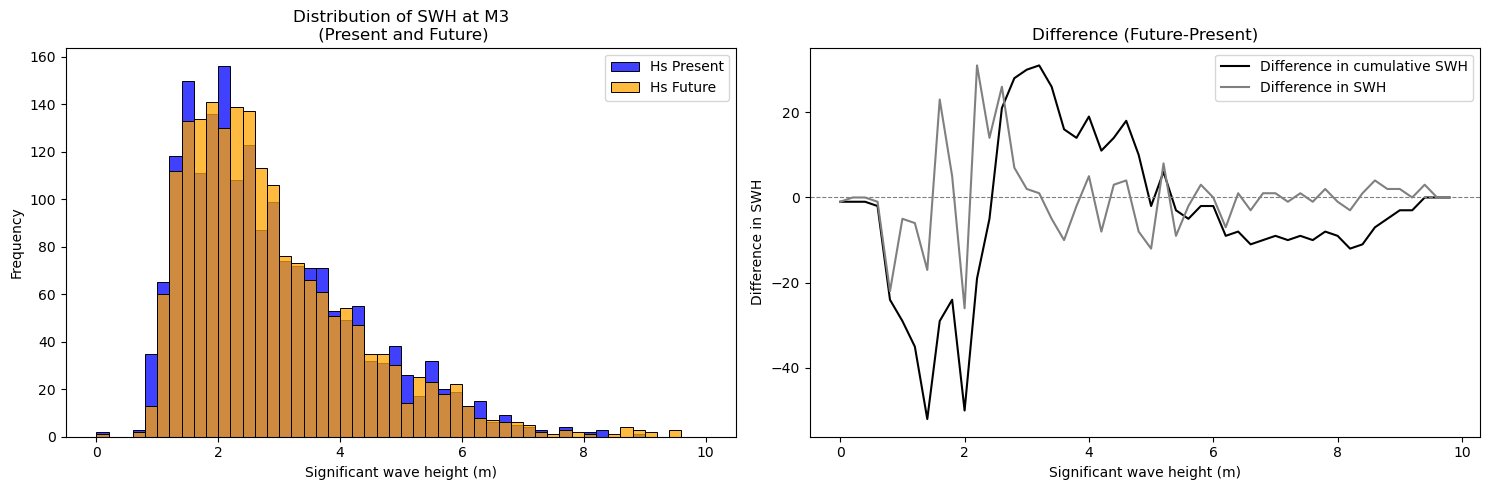

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom bin edges (e.g., 0 to 0.5, 0.5 to 1, etc.)
bin_edges = np.arange(0, max(max(phs3), max(fhs3)) + 0.5, 0.2)  # Bins of size 0.25

# Compute histogram frequencies for cumulative frequency
phs_freq, _ = np.histogram(phs3, bins=bin_edges)
fhs_freq, _ = np.histogram(fhs3, bins=bin_edges)

# Compute cumulative frequencies
phs_cumulative = np.cumsum(phs_freq)
fhs_cumulative = np.cumsum(fhs_freq)

# Compute the difference in cumulative frequencies
cumulative_diff = fhs_cumulative - phs_cumulative

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# Plot 1: Histogram for Hs (Present and Future)
sns.histplot(phs3, kde=False, bins=bin_edges, label='Hs Present', ax=axes[0], color='blue')
sns.histplot(fhs3, kde=False, bins=bin_edges, label='Hs Future', ax=axes[0], color='orange')
axes[0].set_xlabel('Significant wave height (m)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SWH at M3\n (Present and Future)')
axes[0].legend()
axes[0].grid(False)

# Plot 2: Cumulative Frequency Difference
axes[1].plot(bin_edges[:-1], cumulative_diff, label='Difference in cumulative SWH', color='black')
axes[1].plot(bin_edges[:-1], fhs_freq - phs_freq, label='Difference in SWH', color='grey')
axes[1].set_xlabel('Significant wave height (m)')
axes[1].set_ylabel('Difference in SWH')
axes[1].set_title('Difference (Future-Present)')
axes[1].axhline(0, color='grey', linestyle='--', linewidth=0.8)  # Add a horizontal line at 0
axes[1].legend()
axes[1].grid(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('/work/uo1075/b381754/data/wam/Validate/SWAN/plots/p_f/distribution/m3_dist_pf.png')

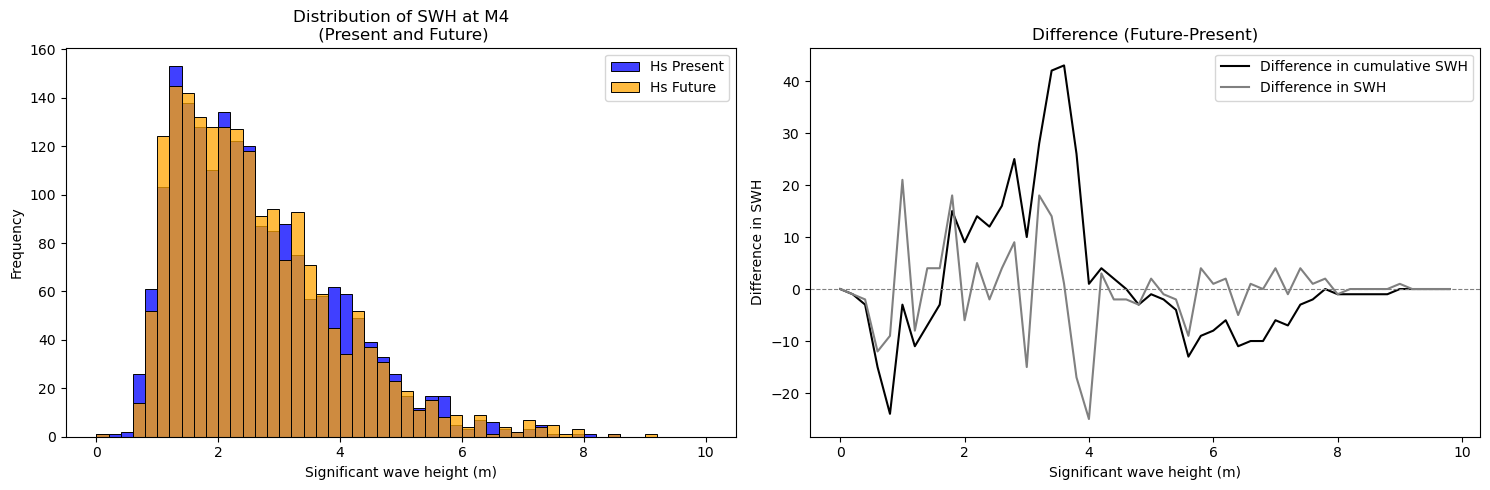

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom bin edges (e.g., 0 to 0.5, 0.5 to 1, etc.)
bin_edges = np.arange(0, max(max(phs4), max(fhs3)) + 0.5, 0.2)  # Bins of size 0.25

# Compute histogram frequencies for cumulative frequency
phs_freq, _ = np.histogram(phs4, bins=bin_edges)
fhs_freq, _ = np.histogram(fhs4, bins=bin_edges)

# Compute cumulative frequencies
phs_cumulative = np.cumsum(phs_freq)
fhs_cumulative = np.cumsum(fhs_freq)

# Compute the difference in cumulative frequencies
cumulative_diff = fhs_cumulative - phs_cumulative

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# Plot 1: Histogram for Hs (Present and Future)
sns.histplot(phs4, kde=False, bins=bin_edges, label='Hs Present', ax=axes[0], color='blue')
sns.histplot(fhs4, kde=False, bins=bin_edges, label='Hs Future', ax=axes[0], color='orange')
axes[0].set_xlabel('Significant wave height (m)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SWH at M4\n (Present and Future)')
axes[0].legend()
axes[0].grid(False)

# Plot 2: Cumulative Frequency Difference
axes[1].plot(bin_edges[:-1], cumulative_diff, label='Difference in cumulative SWH', color='black')
axes[1].plot(bin_edges[:-1], fhs_freq - phs_freq, label='Difference in SWH ', color='grey')
axes[1].set_xlabel('Significant wave height (m)')
axes[1].set_ylabel('Difference in SWH')
axes[1].set_title('Difference (Future-Present)')
axes[1].axhline(0, color='grey', linestyle='--', linewidth=0.8)  # Add a horizontal line at 0
axes[1].legend()
axes[1].grid(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('/work/uo1075/b381754/data/wam/Validate/SWAN/plots/p_f/distribution/m4_dist_pf.png')

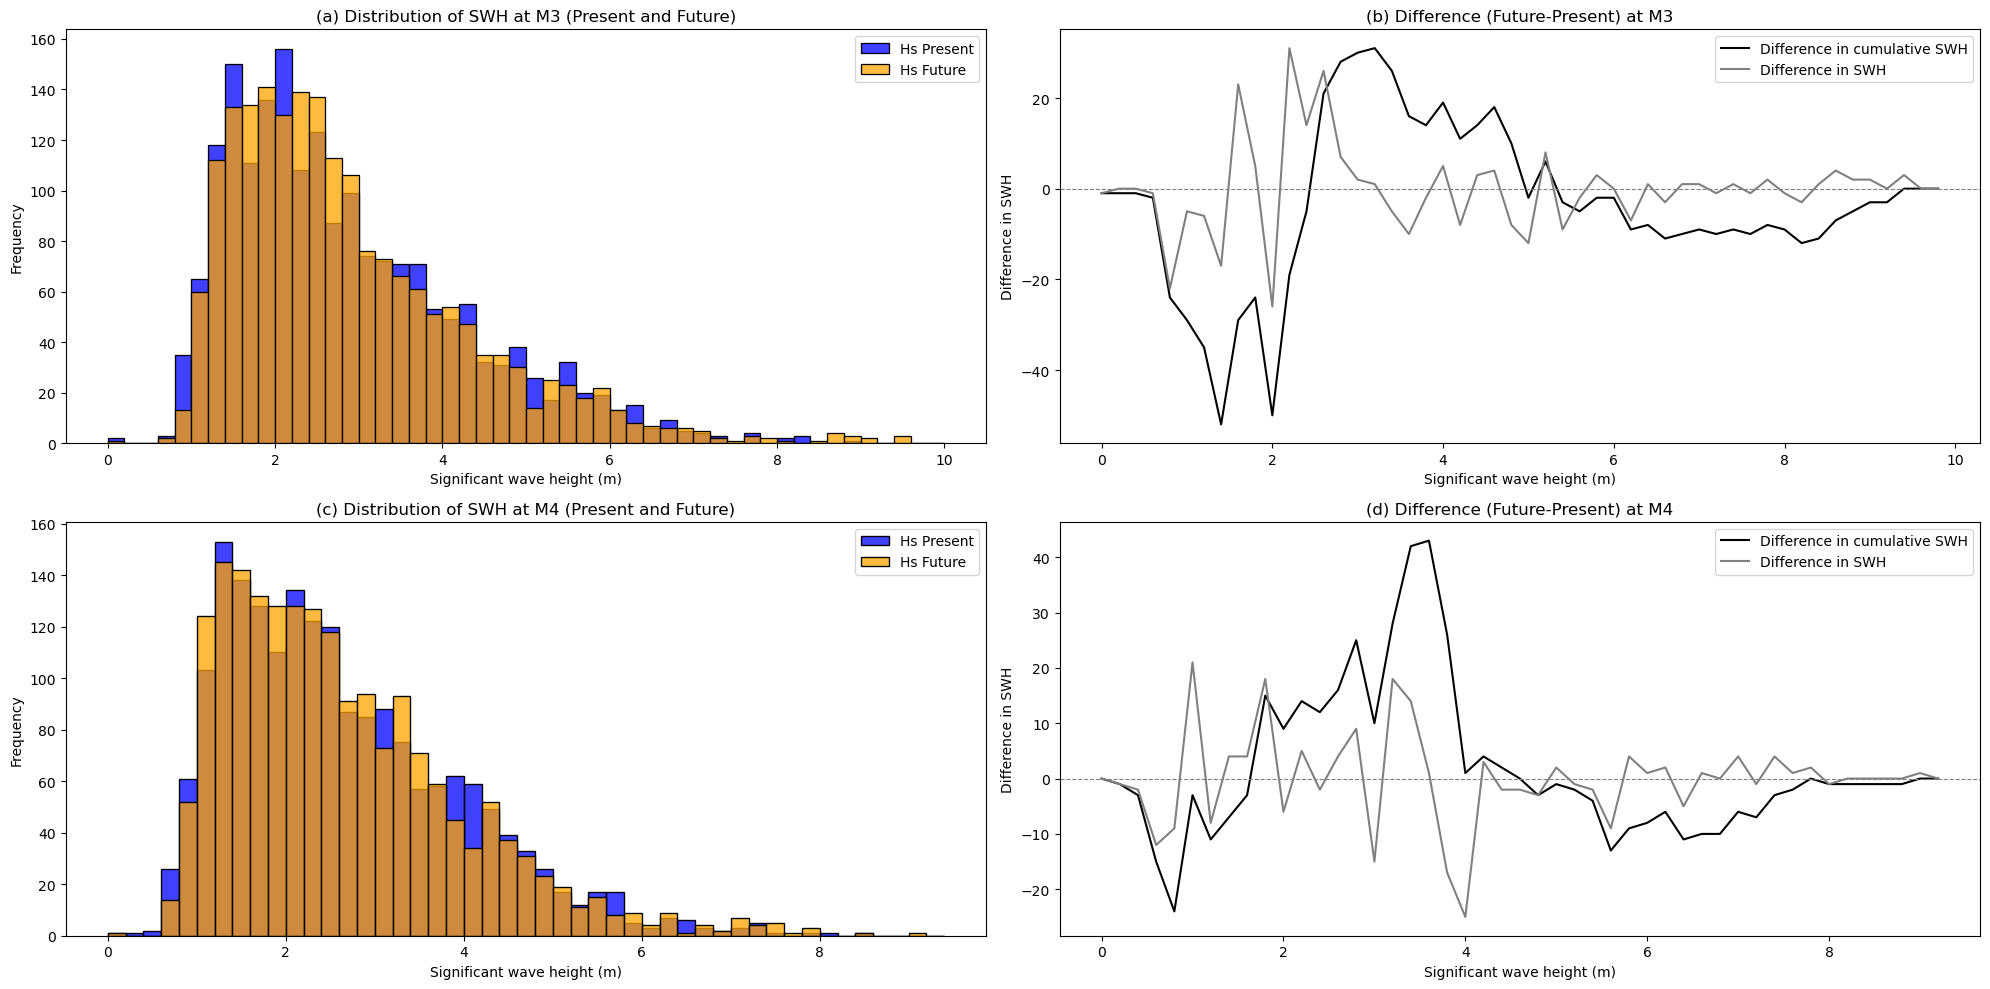

In [12]:

# Define custom bin edges for M3 and M4
bin_edges_m3 = np.arange(0, max(max(phs3), max(fhs3)) + 0.5, 0.2)  # M3
bin_edges_m4 = np.arange(0, max(max(phs4), max(fhs4)) + 0.5, 0.2)  # M4

# Compute frequencies and cumulative for M3
phs_freq_m3, _ = np.histogram(phs3, bins=bin_edges_m3)
fhs_freq_m3, _ = np.histogram(fhs3, bins=bin_edges_m3)
phs_cumulative_m3 = np.cumsum(phs_freq_m3)
fhs_cumulative_m3 = np.cumsum(fhs_freq_m3)
cumulative_diff_m3 = fhs_cumulative_m3 - phs_cumulative_m3

# Compute frequencies and cumulative for M4
phs_freq_m4, _ = np.histogram(phs4, bins=bin_edges_m4)
fhs_freq_m4, _ = np.histogram(fhs4, bins=bin_edges_m4)
phs_cumulative_m4 = np.cumsum(phs_freq_m4)
fhs_cumulative_m4 = np.cumsum(fhs_freq_m4)
cumulative_diff_m4 = fhs_cumulative_m4 - phs_cumulative_m4

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(20, 10))  # 2 rows, 2 columns

# Plot 1: M3 Histogram
sns.histplot(phs3, kde=False, bins=bin_edges_m3, label='Hs Present', ax=axes[0, 0], color='blue')
sns.histplot(fhs3, kde=False, bins=bin_edges_m3, label='Hs Future', ax=axes[0, 0], color='orange')
axes[0, 0].set_xlabel('Significant wave height (m)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('(a) Distribution of SWH at M3 (Present and Future)')
axes[0, 0].legend()
axes[0, 0].grid(False)

# Plot 2: M3 Cumulative Frequency Difference
axes[0, 1].plot(bin_edges_m3[:-1], cumulative_diff_m3, label='Difference in cumulative SWH', color='black')
axes[0, 1].plot(bin_edges_m3[:-1], fhs_freq_m3 - phs_freq_m3, label='Difference in SWH', color='grey')
axes[0, 1].set_xlabel('Significant wave height (m)')
axes[0, 1].set_ylabel('Difference in SWH')
axes[0, 1].set_title('(b) Difference (Future-Present) at M3')
axes[0, 1].axhline(0, color='grey', linestyle='--', linewidth=0.8)  # Horizontal line at 0
axes[0, 1].legend()
axes[0, 1].grid(False)

# Plot 3: M4 Histogram
sns.histplot(phs4, kde=False, bins=bin_edges_m4, label='Hs Present', ax=axes[1, 0], color='blue')
sns.histplot(fhs4, kde=False, bins=bin_edges_m4, label='Hs Future', ax=axes[1, 0], color='orange')
axes[1, 0].set_xlabel('Significant wave height (m)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('(c) Distribution of SWH at M4 (Present and Future)')
axes[1, 0].legend()
axes[1, 0].grid(False)

# Plot 4: M4 Cumulative Frequency Difference
axes[1, 1].plot(bin_edges_m4[:-1], cumulative_diff_m4, label='Difference in cumulative SWH', color='black')
axes[1, 1].plot(bin_edges_m4[:-1], fhs_freq_m4 - phs_freq_m4, label='Difference in SWH', color='grey')
axes[1, 1].set_xlabel('Significant wave height (m)')
axes[1, 1].set_ylabel('Difference in SWH')
axes[1, 1].set_title('(d) Difference (Future-Present) at M4')
axes[1, 1].axhline(0, color='grey', linestyle='--', linewidth=0.8)  # Horizontal line at 0
axes[1, 1].legend()
axes[1, 1].grid(False)

# Adjust layout and display
plt.tight_layout()
plt.savefig('/work/uo1075/b381754/data/wam/Validate/SWAN/plots/p_f/distribution/m34_dist_pf.png')
